In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import decomposition 
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans




### Load the cleaned DataFrame:

In [20]:
import pandas as pd

# Load your dataset
Music_new = pd.read_csv('Music_new.csv')


### Dropping non -numeric columns which is not needed for clustering:

In [21]:

X=Music_new.drop(columns=['artist_name','track_name','genre','topic','release_date'])
X

,Unnamed: 0,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000
1,4,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000
2,6,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000
3,10,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000
4,12,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286
28358,82448,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286
28359,82449,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286
28360,82450,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286


In [22]:
# Scale the features:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Finding the optimal number of clusters using Elbow Method:

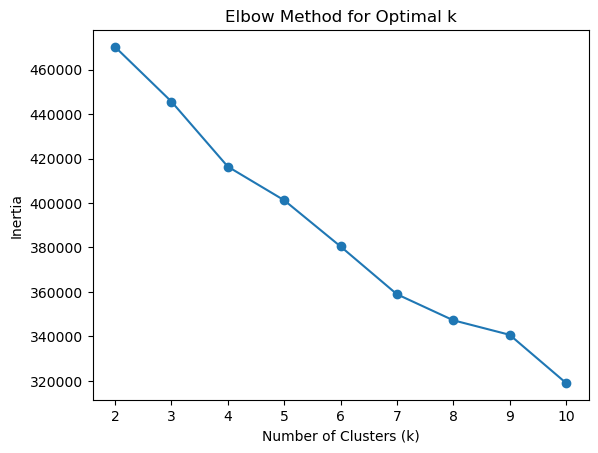

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Based on this plot, the "elbow" appears to be around k=4 or k=5. This suggests that using 4 or 5 clusters might be a good choice for the dataset, representing a reasonable trade-off between model complexity (more clusters) and explaining the variance within the data .

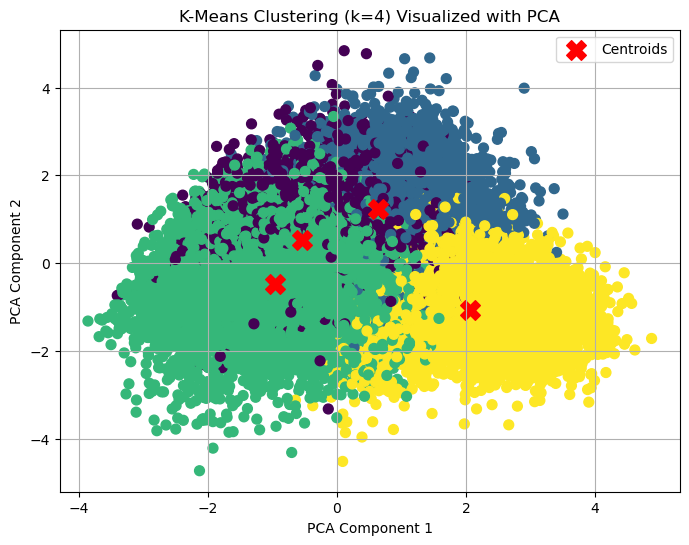

In [24]:


# Reducing the  dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering with 4 clusters 
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Plotting  the PCA-reduced data with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("K-Means Clustering (k=4) Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plotting  the centroids (also in PCA space)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.legend()
plt.grid(True)
plt.show()


### Silhouette Score

In [32]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'k={k}, silhouette score={score:.3f}')



k=2, silhouette score=0.083
k=3, silhouette score=0.074
k=4, silhouette score=0.098
k=5, silhouette score=0.100
k=6, silhouette score=0.116
k=7, silhouette score=0.133
k=8, silhouette score=0.135
k=9, silhouette score=0.120
k=10, silhouette score=0.140


### k=2 to k=8: The silhouette score gradually increases, indicating that adding more clusters is helping to better separate the data. 
### k=9:        There is a slight dip in the silhouette score. The best Silhouette score  is at K=10 ,0.140. 



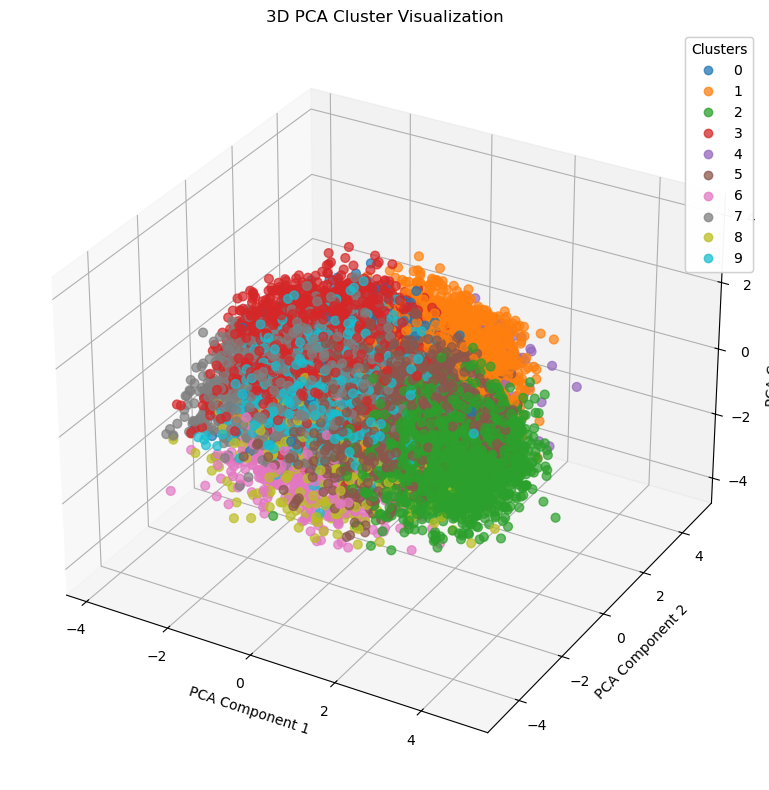

In [40]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Reduce to 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Add to DataFrame (optional)
Music_new['PCA1'] = X_pca_3d[:, 0]
Music_new['PCA2'] = X_pca_3d[:, 1]
Music_new['PCA3'] = X_pca_3d[:, 2]

# 3D Scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    Music_new['PCA1'], Music_new['PCA2'], Music_new['PCA3'],
    c=Music_new['cluster'], cmap='tab10', s=40, alpha=0.7
)

ax.set_title('3D PCA Cluster Visualization')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()


### t-SNE for Music Dataset Visualization:

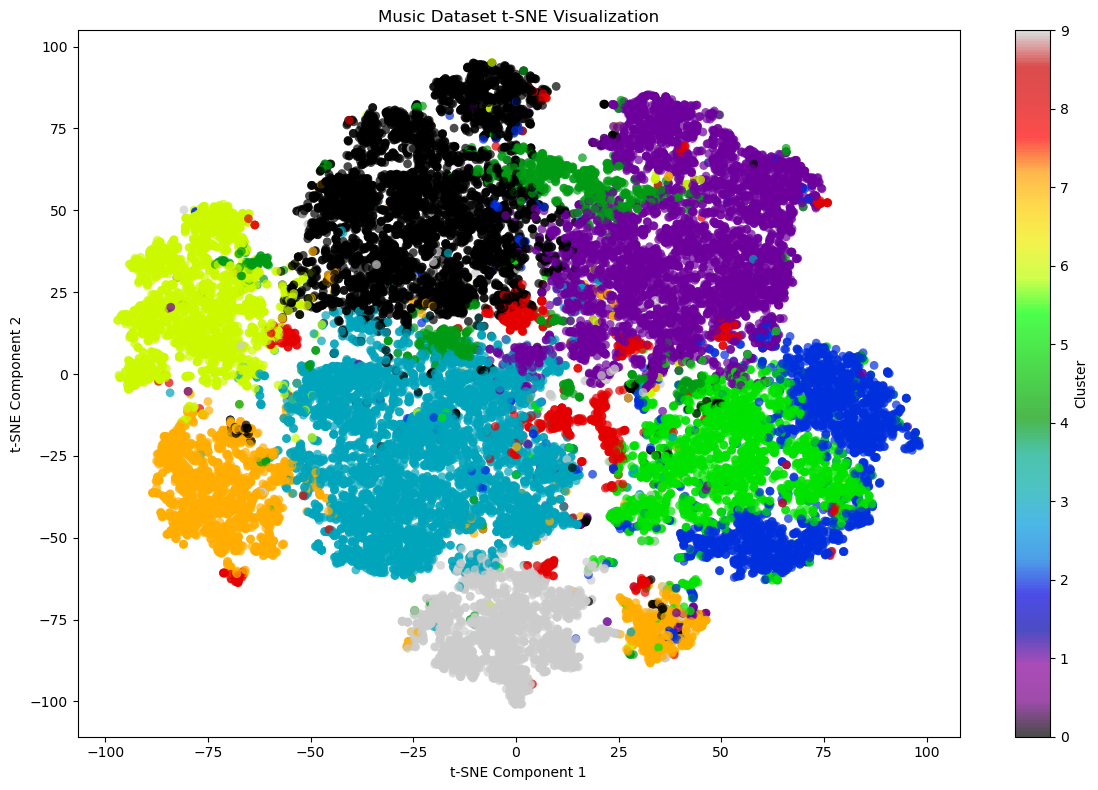

In [31]:
from sklearn.manifold import TSNE


# Run t-SNE (reduce dimensions to 2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=kmeans.labels_,  
    cmap='nipy_spectral', edgecolor='none',
    alpha=0.7, s=40
)
plt.colorbar(label='Cluster')
plt.title('Music Dataset t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()


### The points are colored according to cluster assignments. The color bar on the right indicates that the data has been grouped into 10 clusters (labeled 0 through 9). Each color corresponds to a specific cluster.Points that are close together in this 2D plot are likely similar to each other in the original high-dimensional music feature space. The different colored groups represent different types or categories of music identified by the clustering algorithm.
